In [1]:
import numpy as np
from scipy.special import *
import matplotlib.pyplot as plt

In [71]:
def Vmorse(R,De,Re,we):
    return De*(np.exp(-2*(R-Re)/we)-2*np.exp(-(R-Re)/we))

In [80]:
def psiR(R,lambd,nu,Re,we):
    zv=2*lambd*np.exp(-(R-Re)/we)
    return psiz(zv,lambd,nu)#/np.sqrt(we)

def psiz(z,lambd,nu):
    N=np.sqrt((2*lambd-2*nu-1)*factorial(nu)/gamma(2*lambd-nu))
    return np.exp(-z/2)*genlaguerre(nu,2*lambd-2*nu-1)(z)*z**(lambd-nu-1/2)#*N

In [103]:
def Afc(lambd1,Re1,we1,lambd2,Re2,we2):
    nuM1=int(np.floor(lambd1-0.5))
    nuM2=int(np.floor(lambd2-0.5))
    Amunu=np.zeros((nuM1+1,nuM2+1))
    Rv = np.linspace(0,50*max(we1,we2)+max(Re1,Re2),10000)
    for nu1 in range(nuM1+1):
        psi1 = psiR(Rv,lambd1,nu1,Re1,we1)
        N1 = np.sum(psi1*np.conjugate(psi1))
        for nu2 in range(nuM2+1):
            psi2 = psiR(Rv,lambd2,nu2,Re2,we2)
            N2 = np.sum(psi2*np.conjugate(psi2))
            Amunu[nu1,nu2] = np.sum(psi1*psi2)/np.sqrt(N1*N2)
    return Amunu

In [106]:
Afc(10.2,1,0.5,4.8,1.5,0.8)

array([[ 0.30248104, -0.36568951,  0.33794774, -0.2604567 ,  0.12542701],
       [ 0.39478592, -0.32423987,  0.19619158, -0.09965232,  0.03686586],
       [ 0.48230689, -0.23526562,  0.0446989 ,  0.03132354, -0.02690032],
       [ 0.48041424,  0.00421839, -0.18557686,  0.18079643, -0.09018857],
       [ 0.41898318,  0.26273041, -0.28079723,  0.16135977, -0.06148465],
       [ 0.29297491,  0.47654448, -0.17663068, -0.01147653,  0.03165838],
       [ 0.15878555,  0.51138022,  0.17300273, -0.2441452 ,  0.11918096],
       [ 0.05105787,  0.36392808,  0.5372147 , -0.19525599,  0.03799671],
       [ 0.00471137,  0.12511997,  0.58621579,  0.33325965, -0.17587398],
       [-0.00141794, -0.00460837,  0.18277874,  0.79461962,  0.12942202]])

In [70]:
xv=np.linspace(0,10,20000)
np.sum(psiR(xv,10,0,1,1)*psiR(xv,10,0,1,1))*10/20000

0.9999499903626263

(-2.0, 4.0)

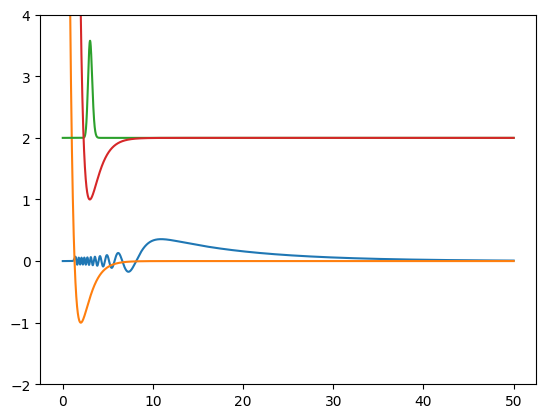

In [95]:
xv=np.linspace(0,50,20000)
Re=2
we=1
plt.plot(xv,psiR(xv,20.6,20,Re,we),xv,Vmorse(xv,1,Re,we))
plt.plot(xv,psiR(xv,20,0,Re+1,we)+2,xv,Vmorse(xv,1,Re+1,we)+2)
plt.ylim([-2,4])

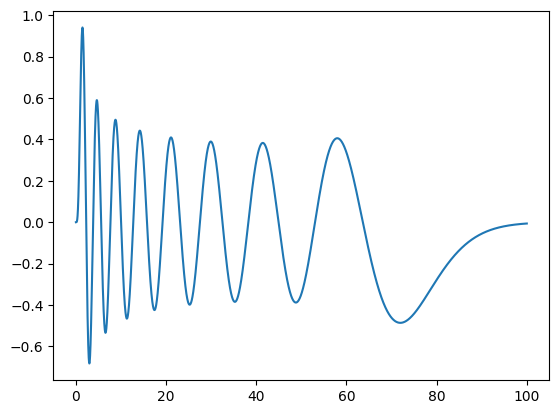

In [48]:
xv=np.linspace(0,100,20000)
plt.plot(xv,psiz(xv,20,15))